In [1]:
%pip install -q -r requirements.txt

Note: you may need to restart the kernel to use updated packages.


In [2]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
import numpy as np

In [3]:
# load hyperparams instance
from hyper_params import HyperParams
params = HyperParams()


In [4]:
DATA_DIR='data'

In [5]:
from dataproc import io
io.DATA_DIR='data'

# Prepare data for training and testing, without AutoEncoder

## 1. build all features dataset, for all 54k admissions

In [ ]:
# build all features dataset
import featues_datasets_all_patients
featues_datasets_all_patients.DATA_DIR = DATA_DIR
df_final_dataset = featues_datasets_all_patients.run(params, binning_numerics=False)

## 2. build a labeled cohort

In [9]:
df_final_dataset = io.load_dataframe('df_final_dataset')

In [10]:
df_final_dataset.shape

(54871, 746)

In [11]:
# create a cohort dataframe and numpy file
import build_cohort_dataset
df_cohort = build_cohort_dataset.build_cohort(params, df_final_dataset)

df_labels: (4130, 2)
cohort dataset: (4085, 747)
cohort data saved to data/fulldata.npy


## To train a model:

The cohort data is now available in either `df_cohort` dataframe, and also on `data/fulldata.npy`

Good luck!



In [25]:
df_cohort.drop(columns=['index']).to_csv('data/fulldata.csv', sep=',', index=False)

# build features dataset for use with Autoencoder

In [12]:
%%time
# build all features dataset for autoencoder
import featues_datasets_all_patients
featues_datasets_all_patients.DATA_DIR = DATA_DIR
df_final_dataset = featues_datasets_all_patients.run(params, binning_numerics=True, create_patients_list_view=True, create_lab_events=True )

hadm_ids table: default.all_pts_24_hours
Previous admits:  (8151, 2)
--------------------------------------------------------------
Open wounds:  (1054, 2)
--------------------------------------------------------------
lab events before selection:  (5909986, 5)
lab events after selection:  (2823545, 5)
shape before dropping sparses (54903, 423)
shape after dropping sparses (54903, 126)
df_lab_results: (54903, 126)
df_lab_flags: (54903, 428)
join_static_and_lab_data: (54871, 561)
df_dataset_processed: (54871, 1338)
df_final_dataset: (54871, 1338)
autoencoder training data saved to data/autoencoder_fulldata.npy
CPU times: user 1min 47s, sys: 23.4 s, total: 2min 10s
Wall time: 3min 37s


In [9]:
dnp = df_final_dataset.to_numpy()

In [10]:
import numpy as np

In [12]:
np.max(dnp), np.min(dnp)

(1, 0)

In [226]:
df_final_dataset=df_final_dataset.drop(columns=['hadm_id'])

In [8]:
df_final_dataset.describe()

,50800_CENTRAL VENOUS,50800_MIX,50800_VEN,50800_nan,50800_flag_nan,50801_1.0,50801_2.0,50801_3.0,50801_4.0,50801_5.0,...,ethnicity_WHITE - EASTERN EUROPEAN,ethnicity_nan,gender_M,gender_nan,age_1.0,age_2.0,age_3.0,age_4.0,age_5.0,age_nan
count,54871.000000,54871.000000,54871.000000,54871.000000,54871.000000,54871.000000,54871.000000,54871.000000,54871.000000,54871.000000,...,54871.000000,54871.0,54871.000000,54871.0,54871.000000,54871.000000,54871.000000,54871.000000,54871.000000,54871.0
mean,0.000984,0.024403,0.032148,0.648594,0.648594,0.013996,0.021414,0.026827,0.024658,0.005941,...,0.000437,0.0,0.559184,0.0,0.040094,0.084799,0.209783,0.272822,0.227187,0.0
std,0.031356,0.154297,0.176395,0.477414,0.477414,0.117477,0.144761,0.161578,0.155081,0.076851,...,0.020909,0.0,0.496489,0.0,0.196182,0.278585,0.407157,0.445414,0.419018,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
50%,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
75%,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,1.000000,0.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.0
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,0.0,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,0.0


In [118]:
df_final_dataset = io.load_dataframe('df_final_dataset')

In [13]:
training_matrix = np.load('data/autoencoder_fulldata.npy')

In [14]:
training_matrix.shape, np.max(training_matrix), np.min(training_matrix)

((54871, 1338), 1.0, 0.0)

In [15]:
training_matrix = training_matrix[:10000,:]

In [16]:
np.save('data/autoencoder_fulldata_mini.npy', training_matrix) 

In [20]:
0.25**2

0.0625

In [22]:
0.075**0.5

0.27386127875258304

# Build multi labels cohort

In [79]:
# create a cohort dataframe and numpy file
import build_cohort_dataset
df_cohort = build_cohort_dataset.build_cohort_bact(params, df_final_dataset)

df_labels: (4130, 2)
cohort dataset: (4085, 1338)
cohort data saved to data/fulldata.npy


In [80]:
from collections import Counter
Counter(df_cohort['y'])

Counter({80026: 1196,
         80002: 1265,
         80004: 718,
         80005: 169,
         80007: 140,
         80008: 349,
         80017: 248})

# TSNE

In [57]:
from sklearn.manifold import TSNE

In [81]:
dataset_file = 'data/fulldata.npy'
dataset = np.load(dataset_file)
dataset.shape

(4085, 1338)

In [82]:
X = dataset[:,:-1]
y = dataset[:,-1]
X.shape, y.shape

((4085, 1337), (4085,))

In [83]:
len(np.unique(y))

7

In [84]:
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})


In [85]:
tsne = TSNE()
X_embedded = tsne.fit_transform(X)

/home/ec2-user/anaconda3/envs/amazonei_pytorch_latest_p36/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:>

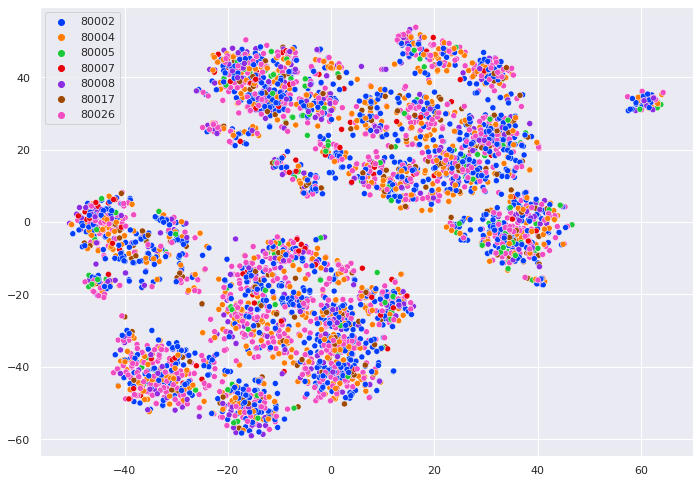

In [86]:
palette = sns.color_palette("bright", len(np.unique(y)))
sns.scatterplot(X_embedded[:,0], X_embedded[:,1], hue=y, legend='full', palette=palette)

In [87]:
np_labeled_data = np.load('data/np_autoencoded_labeled_data.npy')

In [88]:
X = np_labeled_data[:,:-1]
y = np_labeled_data[:,-1]
X.shape, y.shape

((4085, 64), (4085,))

In [89]:
tsne = TSNE()
X_embedded = tsne.fit_transform(X)

In [90]:
y.mean()

80011.09

/home/ec2-user/anaconda3/envs/amazonei_pytorch_latest_p36/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:>

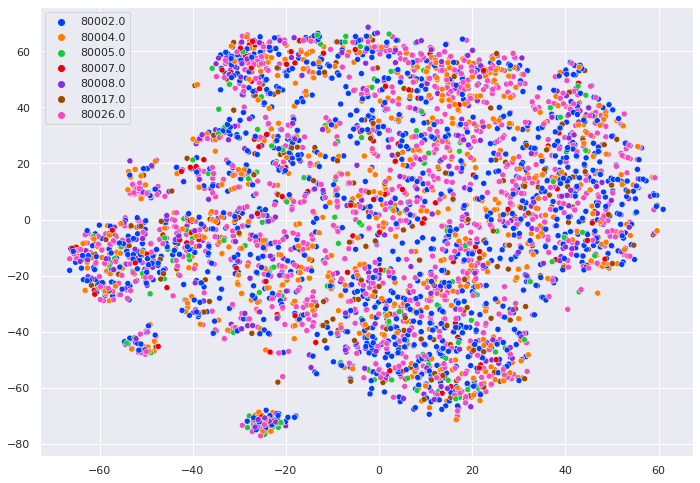

In [91]:
palette = sns.color_palette("bright", len(np.unique(y)))
sns.scatterplot(X_embedded[:,0], X_embedded[:,1], hue=y, legend='full', palette=palette)

## Tools to explore too many unique values

In [ ]:
df_dataset_unprocessed[categorical_cols].nunique().sort_values(ascending=False)[0:20]

In [ ]:
allvals = df_dataset_unprocessed['51508'].unique().tolist()
len(allvals), df_dataset_unprocessed['51508'].notna().sum()

In [ ]:
df_dataset_unprocessed['51508'].value_counts()

In [ ]:
[x for x in allvals if x and not x == np.nan and not str(x).replace('.','').isnumeric()]

In [ ]:
pd.Series(sorted([float(x) for x in allvals if x and str(x).replace('.','').isnumeric() and float(x) > 1000.0])).describe()


In [ ]:
df_dataset_unprocessed.nunique().sort_values(ascending=False)

## THE END

In [ ]:
import torch
torch.__version__

In [ ]:
fulldata